In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import random

from collections import defaultdict
import torch
from torch.utils.data import DataLoader, TensorDataset

# Language Models
from transformers import BertTokenizer, BertForMaskedLM, BertModel

# Classification Models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import re

/Users/owner/miniconda3/envs/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import json

In [11]:
file_path = '../data/moral_data_full.json'

# Load the JSON file into a Python dictionary
with open(file_path, 'r') as f:
    data = json.load(f)

# Now 'data' is a Python dictionary containing the JSON structure

In [12]:
# Count sentences
total_sentences = sum(
    len(sentences)
    for movie, characters in data["moral_dialogue"].items()
    for character, sentences in characters.items()
)

print(f"✅ Total number of sentences: {total_sentences}")

✅ Total number of sentences: 244686


In [13]:
exception_data = {
    "Ace Ventura: Pet Detective": ["ACE"],
    "Amadeus": ["MOZART"],
    "Big Eyes": ["WALTER"],
    "Boyhood": ["DAD"],
    "Crazylove": ["LETTY"],
    "Deception": ["JONATHAN"],
    "Departed, The": ["COLIN"],
    "Fabulous Baker Boys, The": ["FRANK"],
    "Jay and Silent Bob Strike Back": ["JAY"],
    "Man Trouble": ["HARRY"],
    "Manhattan Murder Mystery": ["CAROL"],
    "Midnight in Paris": ["GIL"],
    "Never Been Kissed": ["JOSIE"],
    "Notting Hill": ["WILLIAM"],
    "One Flew Over the Cuckoo's Nest": ["MCMURPHY"],
    "Pineapple Express": ["SAUL"],
    "Pretty Woman (final script)": ["EDWARD"],
    "Saving Mr. Banks": ["PAMELA"],
    "Secret Life of Walter Mitty, The": ["WALTER"],
    "Semi-Pro": ["JACKIE MOON"],
    "Sherlock Holmes": ["HOLMES"],
    "Sideways": ["MILES"],
    "Sunset Blvd.": ["GILLIS"],
    "Superbad": ["SETH"],
    "Twins": ["VINCE"],
    "Two For The Money": ["WALTER"],
    "Ugly Truth, The": ["ABBY", "MIKE"]
}

### Histogram of the number of moral sentences for each character

Moral sentences here refers to the sentences containing moral words from hte and mfd.

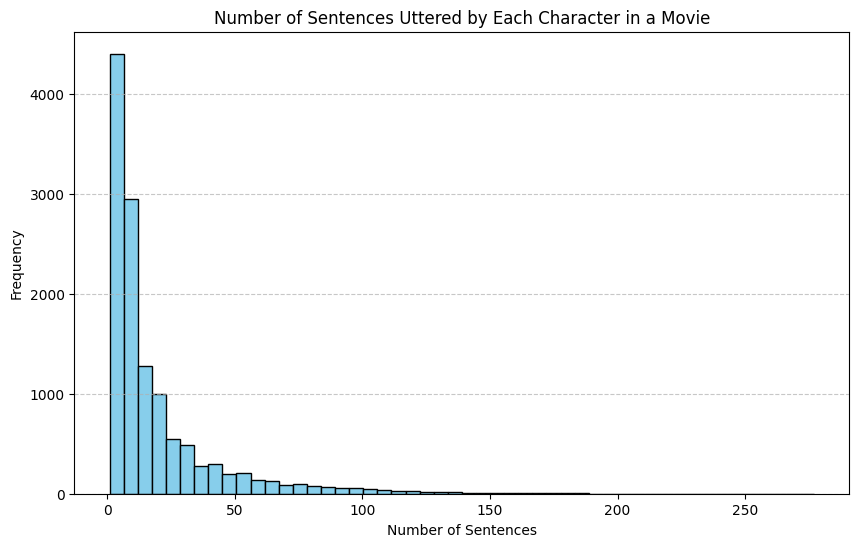

In [5]:
# Extract number of sentences per character in each movie
character_sentence_count = [
    len(sentences) 
    for movie, characters in data["moral_dialogue"].items()
    for character, sentences in characters.items()
    
]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(character_sentence_count, bins=50, edgecolor='black', color='skyblue')
plt.title('Number of Sentences Uttered by Each Character in a Movie')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('..//data//histogram_1.png')
plt.show()

In [6]:
np.mean(character_sentence_count)

19.34735510397723

In [7]:
np.median(character_sentence_count)

10.0

In [22]:
count = 0
for movie, characters in data["moral_dialogue"].items():
    for character, sentences in characters.items():
        if len(sentences) > 100:
            count+= len(sentences)
print(count)

36185


In [23]:
count = 0
for movie, characters in data["moral_dialogue"].items():
    for character, sentences in characters.items():
        if len(sentences) > 100 and not ( movie in exception_data and character in exception_data[movie]):
            count+= len(sentences)
print(count)


33138


In [24]:
2*(12039 + 4992)

34062

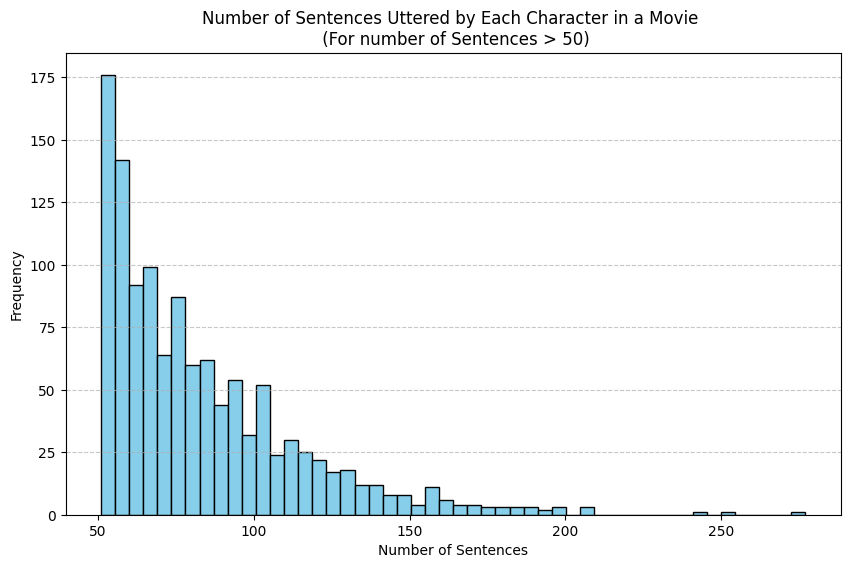

In [8]:
character_sentence_count = [
    len(sentences) 
    for movie, characters in data["moral_dialogue"].items()
    for character, sentences in characters.items()
    if len(sentences) > 50
]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(character_sentence_count, bins=50, edgecolor='black', color='skyblue')
plt.title('Number of Sentences Uttered by Each Character in a Movie \n (For number of Sentences > 50)')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.savefig('..//data//histogram_2.png')
plt.show()

In [9]:
print(len(character_sentence_count))
print(np.sum(character_sentence_count))

1192
99519


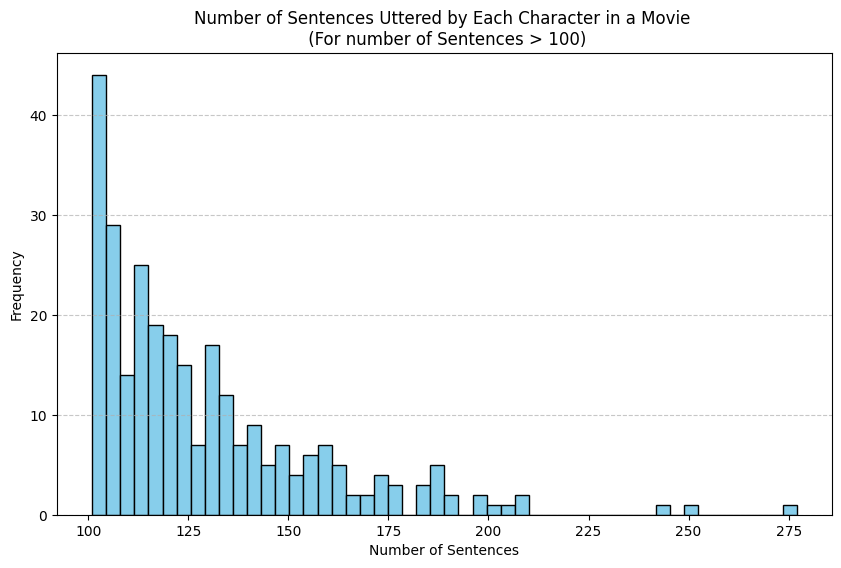

In [25]:
character_sentence_count = [
    len(sentences) 
    for movie, characters in data["moral_dialogue"].items()
    for character, sentences in characters.items()
    if len(sentences) > 100
]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(character_sentence_count, bins=50, edgecolor='black', color='skyblue')
plt.title('Number of Sentences Uttered by Each Character in a Movie \n (For number of Sentences > 100)')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.savefig('..//data//histogram_3.png')
plt.show()

In [26]:
print(len(character_sentence_count))
print(np.sum(character_sentence_count))

280
36185


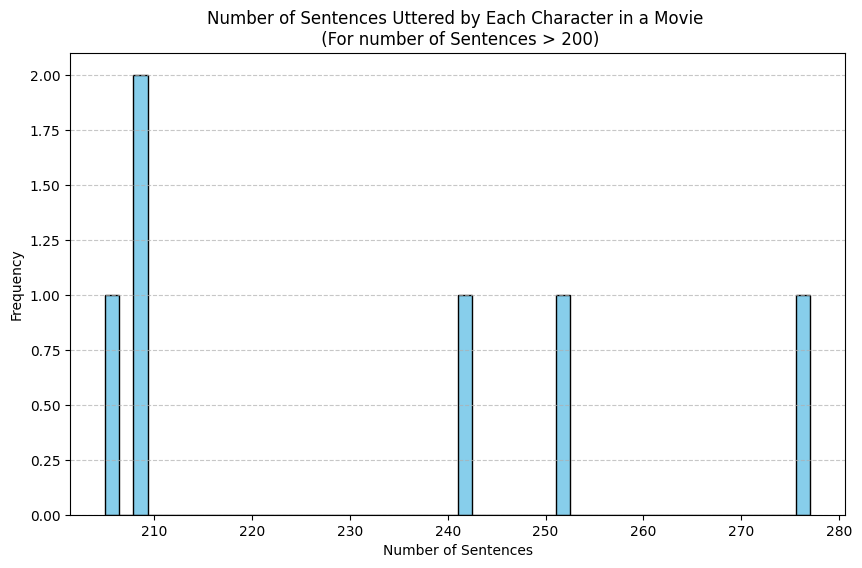

In [12]:
character_sentence_count = [
    len(sentences) 
    for movie, characters in data["moral_dialogue"].items()
    for character, sentences in characters.items()
    if len(sentences) > 200
]

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(character_sentence_count, bins=50, edgecolor='black', color='skyblue')
plt.title('Number of Sentences Uttered by Each Character in a Movie \n (For number of Sentences > 200)')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.savefig('..//data//histogram_3.png')
plt.show()

In [13]:
print(len(character_sentence_count))
print(np.sum(character_sentence_count))

6
1394


We could also show the distributions similar to these but this time moral sentences refers to sentences with moral words from hte/mfd and are also considered morally relevant based on GPT's judgement.

Intern-annotator agreement between the 4 annotators (Aida, Timothy, GPT-4o and GPT-4o-mini) in a 4x4 matrix (Cohen's kappa and K-alpha)

In [14]:
import pandas as pd
from nltk.metrics.agreement import AnnotationTask

# Load the file
df = pd.read_excel("..//data//moral_relevance_comparison_annotated.xlsx")

# Reshape the matrix to triplet format
data_1 = []

for index, row in df.iterrows():
    data_1.append(('Timothy', index, str(row['Timothy\'s annotation'])))
    data_1.append(('Aida', index, str(row['Aida\'s annotation'])))
    data_1.append(('GPT-4o', index, str(row['GPT-4o'])))
    data_1.append(('GPT-4o-mini', index, str(row['GPT-4o-mini'])))

# Calculate agreement
task_1 = AnnotationTask(data_1)
print("Krippendorff's Alpha:", task_1.alpha())


Krippendorff's Alpha: 0.6969934640522877


In [15]:
import itertools

# Define annotators
annotators = ['Timothy', 'Aida', 'GPT-4o', 'GPT-4o-mini']
column_map = {
    'Timothy': "Timothy's annotation",
    'Aida': "Aida's annotation",
    'GPT-4o': "GPT-4o",
    'GPT-4o-mini': "GPT-4o-mini"
}

# Build triplet data
all_data = []
for index, row in df.iterrows():
    for annotator in annotators:
        label = str(row[column_map[annotator]])
        all_data.append((annotator, index, label))

# Create pairwise kappa matrix
kappa_matrix = pd.DataFrame(index=annotators, columns=annotators)

# Compute Cohen's Kappa for each pair
for a1, a2 in itertools.combinations(annotators, 2):
    pair_data = [(a, idx, label) for (a, idx, label) in all_data if a == a1 or a == a2]
    task = AnnotationTask(pair_data)
    kappa = task.kappa()
    kappa_matrix.loc[a1, a2] = round(kappa, 3)
    kappa_matrix.loc[a2, a1] = round(kappa, 3)

# Diagonal = 1 (perfect agreement with self)
for a in annotators:
    kappa_matrix.loc[a, a] = 1.0

# Optional: Display nicely
print("\nCohen's Kappa Matrix:")
kappa_matrix



Cohen's Kappa Matrix:


,Timothy,Aida,GPT-4o,GPT-4o-mini
Timothy,1.0,0.793,0.675,0.651
Aida,0.793,1.0,0.664,0.638
GPT-4o,0.675,0.664,1.0,0.76
GPT-4o-mini,0.651,0.638,0.76,1.0


We've got a substantial agreement between 4 annotators

In [16]:
movie_titles = [
    "Wolf of Wall Street, The",
    "Beauty and the Beast",
    "Willow",
    "Air Force One",
    "Fantastic Four",
    "Analyze This",
    "Devil's Advocate",
    "Observe and Report",
    "Hot Tub Time Machine",
    "White Jazz",
    "Judge Dredd",
    "Danish Girl, The",
    "Wild Bunch, The",
    "Imaginarium of Doctor Parnassus, The",
    "Fault in Our Stars, The",
    "Star Wars: Attack of the Clones",
    "Assassins",
    "Game, The",
    "I Still Know What You Did Last Summer",
    "Thor Ragnarok",
]

len(movie_titles)

20

## Baseline 1

In [17]:
import random

In [18]:
file_path = '../data/moral_data_full.json'

with open(file_path, "r") as f:
    moral_data = json.load(f)

# Extract dictionaries
moral_dialogue = moral_data["moral_dialogue"]
moral_dialogue_masked = moral_data["moral_dialogue_masked"]
ground_truths = moral_data["ground_truths"]

In [19]:
def movie_data_division(split_type="hard", train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Splits original, masked, and ground truth dialogue data into train, validation, and test sets.

    Args:
        split_type (str): "hard" (by movie), "medium" (by character, randomized), "easy" (by speeches, randomized).
        train_ratio (float): Proportion of data for training.
        val_ratio (float): Proportion of data for validation.
        test_ratio (float): Proportion of data for testing.
        only_moral (bool): If True, only considers dialogues containing moral foundation words.

    Returns:
        tuple: (train_data, train_masked, train_labels), (val_data, val_masked, val_labels), (test_data, test_masked, test_labels)
    """
    assert train_ratio + val_ratio + test_ratio == 1, "Ratios should sum up to 1"

    # Choose the appropriate dataset
    dialogue_data = moral_dialogue
    masked_data = moral_dialogue_masked
    label_data = ground_truths

    train_data, train_masked, train_labels = [], [], []
    val_data, val_masked, val_labels = [], [], []
    test_data, test_masked, test_labels = [], [], []

    if split_type == "hard":
        # Split by movie
        movie_keys = list(dialogue_data.keys())
        random.seed(42)
        random.shuffle(movie_keys)

        total_size = len(movie_keys)
        train_end = int(train_ratio * total_size)
        val_end = train_end + int(val_ratio * total_size)

        train_movies = movie_keys[:train_end]
        val_movies = movie_keys[train_end:val_end]
        test_movies = movie_keys[val_end:]

        for movie in train_movies:
            for character in dialogue_data[movie]:
                train_data.extend(dialogue_data[movie][character])
                train_masked.extend(masked_data[movie][character])
                train_labels.extend(label_data[movie][character])

        for movie in val_movies:
            for character in dialogue_data[movie]:
                val_data.extend(dialogue_data[movie][character])
                val_masked.extend(masked_data[movie][character])
                val_labels.extend(label_data[movie][character])

        for movie in test_movies:
            for character in dialogue_data[movie]:
                test_data.extend(dialogue_data[movie][character])
                test_masked.extend(masked_data[movie][character])
                test_labels.extend(label_data[movie][character])

    elif split_type == "medium":
        # Split by character across all movies
        character_entries = []

        for movie, characters in dialogue_data.items():
            for character, lines in characters.items():
                character_entries.append((movie, character))

        random.seed(42)
        random.shuffle(character_entries)

        total_size = len(character_entries)
        train_end = int(train_ratio * total_size)
        val_end = train_end + int(val_ratio * total_size)

        train_chars = character_entries[:train_end]
        val_chars = character_entries[train_end:val_end]
        test_chars = character_entries[val_end:]

        for movie, character in train_chars:
            train_data.extend(dialogue_data[movie][character])
            train_masked.extend(masked_data[movie][character])
            train_labels.extend(label_data[movie][character])

        for movie, character in val_chars:
            val_data.extend(dialogue_data[movie][character])
            val_masked.extend(masked_data[movie][character])
            val_labels.extend(label_data[movie][character])

        for movie, character in test_chars:
            test_data.extend(dialogue_data[movie][character])
            test_masked.extend(masked_data[movie][character])
            test_labels.extend(label_data[movie][character])

    else:  # "easy" split
        # Split at the individual speech level
        all_speeches = []
        all_masked = []
        all_labels = []

        for movie in dialogue_data:
            for character in dialogue_data[movie]:
                all_speeches.extend(dialogue_data[movie][character])
                all_masked.extend(masked_data[movie][character])
                all_labels.extend(label_data[movie][character])

        combined = list(zip(all_speeches, all_masked, all_labels))
        random.seed(42)
        random.shuffle(combined)

        all_speeches, all_masked, all_labels = zip(*combined)

        total_size = len(all_speeches)
        train_end = int(train_ratio * total_size)
        val_end = train_end + int(val_ratio * total_size)
        test_end = val_end + int(test_ratio * total_size)

        train_data, train_masked, train_labels = all_speeches[:train_end], all_masked[:train_end], all_labels[:train_end]
        val_data, val_masked, val_labels = all_speeches[train_end:val_end], all_masked[train_end:val_end], all_labels[train_end:val_end]
        test_data, test_masked, test_labels = all_speeches[val_end:test_end], all_masked[val_end:test_end], all_labels[val_end:test_end]

    return (train_data, train_masked, train_labels), (val_data, val_masked, val_labels), (test_data, test_masked, test_labels)

In [20]:
back_up_moral_dialogue = moral_dialogue
back_up_moral_dialogue_masked = moral_dialogue_masked
back_up_ground_truths = ground_truths

In [21]:
count = 0

for movie in moral_dialogue:
    for character in moral_dialogue[movie]:
        count += len(moral_dialogue[movie][character])

print("Number of lines with moral words: ", count)

Number of lines with moral words:  244686


In [22]:
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForMaskedLM.from_pretrained(model_name)
model.to(device)

# Set model to evaluation mode
model.eval()

# Load validation set from previous data split
(_, _, _), (val_data, val_masked, val_labels), (_, _, _) = movie_data_division(split_type="hard")

def batch_predict_masked_words(masked_sentences, k=5, batch_size=16):
    """Predicts top-k words for multiple [MASK] tokens in batch."""
    tokenized_inputs = tokenizer(masked_sentences, return_tensors="pt", padding=True, truncation=True, max_length=512)
    
    dataset = TensorDataset(tokenized_inputs.input_ids, tokenized_inputs.attention_mask)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    predictions = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc=f"Top-{k} prediction"):
            input_ids, attention_mask = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits  # Shape: [batch_size, seq_length, vocab_size]

            batch_predictions = []
            for i in range(input_ids.shape[0]):  # Iterate over batch items
                mask_indices = torch.where(input_ids[i] == tokenizer.mask_token_id)[0]  # ✅ Find `[MASK]` index per batch item
                
                if len(mask_indices) == 0:  # ✅ If no `[MASK]`, add placeholder prediction
                    batch_predictions.append(["[NO MASK]"] * k)
                    continue
                
                mask_idx = mask_indices[0].item()  # Take first `[MASK]` index
                
                if mask_idx >= logits.shape[1]:  # ✅ Prevent index out of bounds
                    batch_predictions.append(["[NO MASK]"] * k)
                    continue
                
                softmax = torch.nn.functional.softmax(logits[i, mask_idx], dim=0)
                top_k_tokens = torch.topk(softmax, k)
                predicted_words = tokenizer.batch_decode(top_k_tokens.indices.unsqueeze(1), skip_special_tokens=True)
                batch_predictions.append(predicted_words)

            predictions.extend(batch_predictions)

    return predictions

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls

In [23]:
len(val_masked)

35871

In [24]:
from tqdm import tqdm

# Step 1: Run prediction only once with k=10
print("\nRunning prediction once with k=10...")
top_k_predictions = batch_predict_masked_words(val_masked, k=10, batch_size=16)

# Step 2: Compute Accuracy@k for k from 1 to 10
top_k_range = list(range(1, 11))
accuracy_scores = []

for k in top_k_range:
    accuracy_at_k = np.mean([
        1 if truth in preds[:k] else 0
        for truth, preds in zip(val_labels, top_k_predictions)
    ])
    accuracy_scores.append(accuracy_at_k)
    print(f"Accuracy@{k}: {accuracy_at_k:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(top_k_range, accuracy_scores, marker='o', linestyle='-', label='Accuracy@k')
plt.xlabel("Top-k")
plt.ylabel("Accuracy")
plt.title("Accuracy@k vs. k")
plt.legend()
plt.grid(True)
plt.show()



Running prediction once with k=10...


Top-10 prediction:   2%|▏         | 56/2242 [02:28<1:36:41,  2.65s/it]


KeyboardInterrupt: 